In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport


/home/cc/PANDAS_Projects/.venvPD/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
marketDF=pd.read_csv('project/supermarket_sales.csv')
marketDF.head(3)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total    Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715  1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200  3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255  3/3/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4

In [6]:
marketDF.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
marketDF.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [64]:
marketDF['Date'] = pd.to_datetime(marketDF['Date'])

In [10]:
marketDF['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [65]:
marketDF.set_index('Date', inplace=True)

In [13]:
marketDF.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [58]:
marketDF.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.700292     5.503568    15.379369   322.966749   307.58738   
std      26.418307     2.897176    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      33.207500     3.000000     5.924875   124.422375   118.49750   
50%      55.535000     5.503568    12.088000   253.848000   241.76000   
75%      77.772500     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

###  distribution of customer ratings 

/home/cc/PANDAS_Projects/.venvPD/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


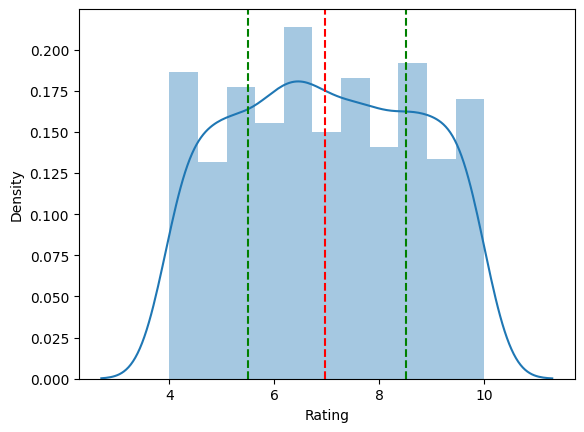

In [24]:
sns.distplot(marketDF['Rating'])
plt.axvline(x=np.mean(marketDF['Rating']),c='red', ls='--')
plt.axvline(np.percentile(marketDF["Rating"], 25), c='green', ls='--')
plt.axvline(np.percentile(marketDF["Rating"], 75), c='green', ls='--')

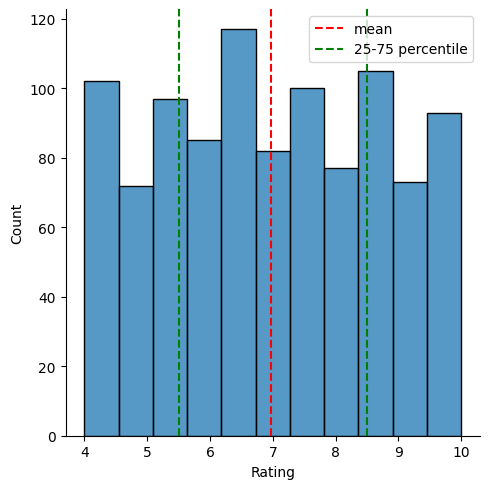

In [26]:
sns.displot(marketDF['Rating'])
plt.axvline(x=np.mean(marketDF['Rating']),c='red', ls='--',label= 'mean')
plt.axvline(np.percentile(marketDF["Rating"], 25), c='green', ls='--')
plt.axvline(np.percentile(marketDF["Rating"], 75), c='green', ls='--',label='25-75 percentile')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

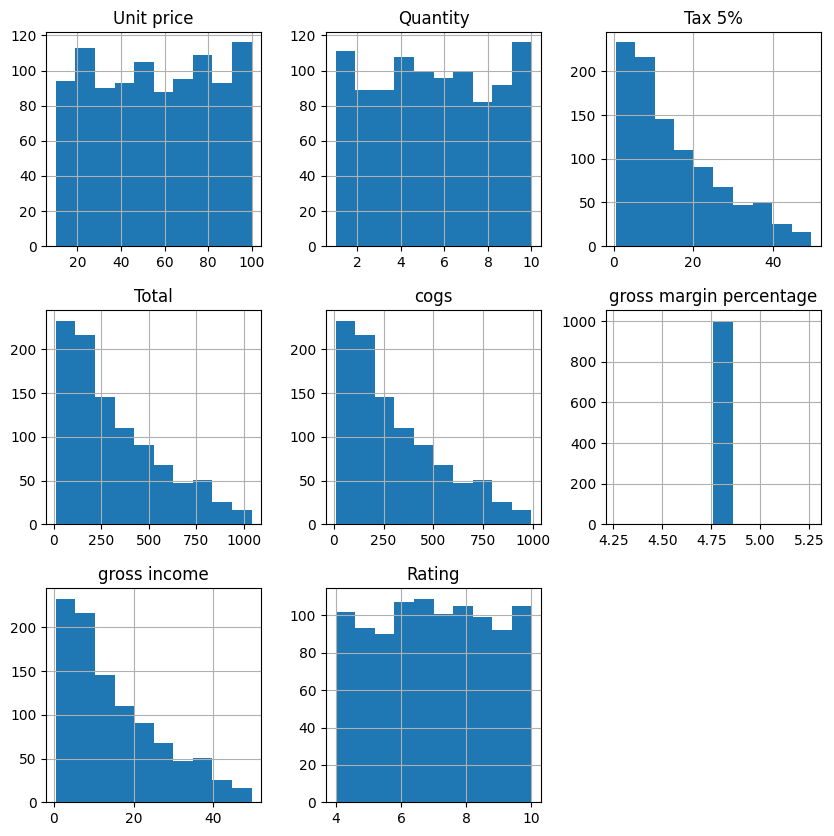

In [28]:
marketDF.hist(figsize=(10,10))

In [30]:
marketDF.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

### do aggregate sales numbers differ by much between branches?

In [33]:
marketDF.groupby(['Branch'])

In [29]:
marketDF.groupby(['Branch'])['Branch'].count()

Branch
A    342
B    333
C    328
Name: Branch, dtype: int64

In [35]:
marketDF['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

/home/cc/PANDAS_Projects/.venvPD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

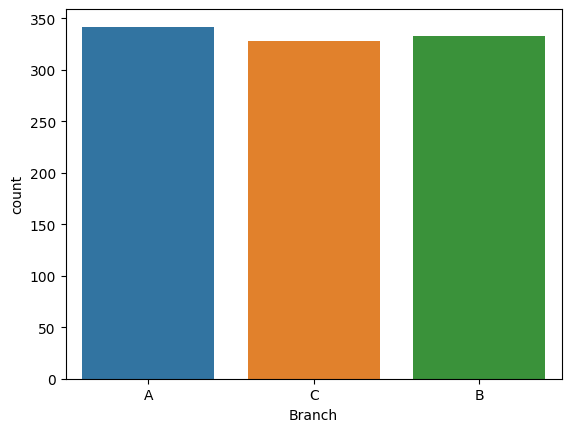

In [34]:
sns.countplot(marketDF['Branch'])

/home/cc/PANDAS_Projects/.venvPD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

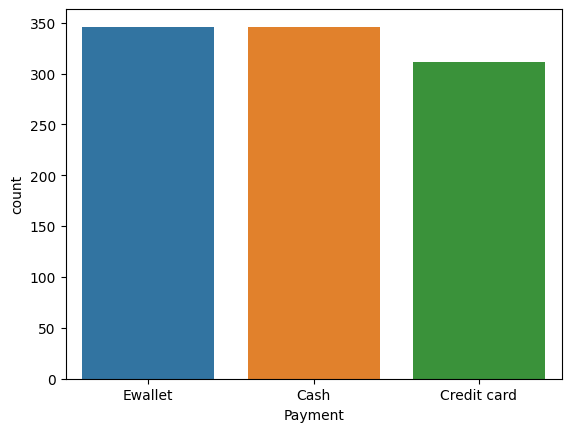

In [36]:
sns.countplot(marketDF['Payment'])

### relationship between gross income(how much they spend) constumer ratings

In [6]:
marketDF[['Rating','gross income']].head(3)

Rating  gross income
Date                            
2019-01-05     9.1       26.1415
2019-03-08     9.6        3.8200
2019-03-03     7.4       16.2155

/home/cc/PANDAS_Projects/.venvPD/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

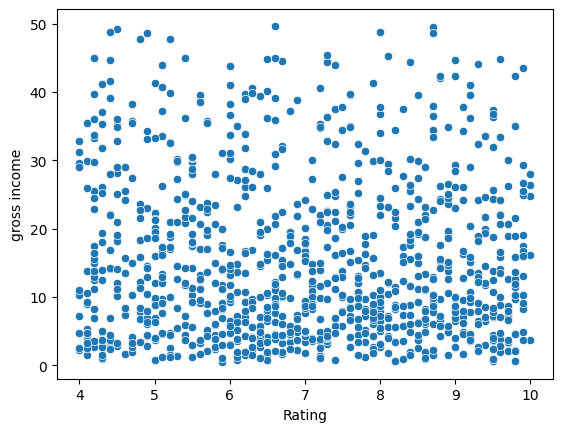

In [8]:
sns.scatterplot(marketDF.Rating,marketDF['gross income'])

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

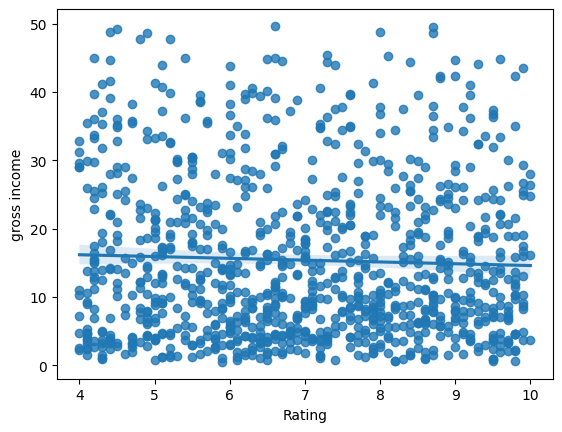

In [10]:
sns.regplot(x=marketDF.Rating,y=marketDF['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

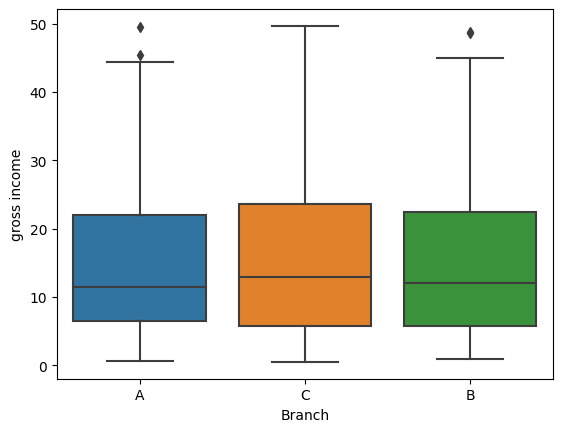

In [11]:
sns.boxplot(x=marketDF.Branch,y=marketDF['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

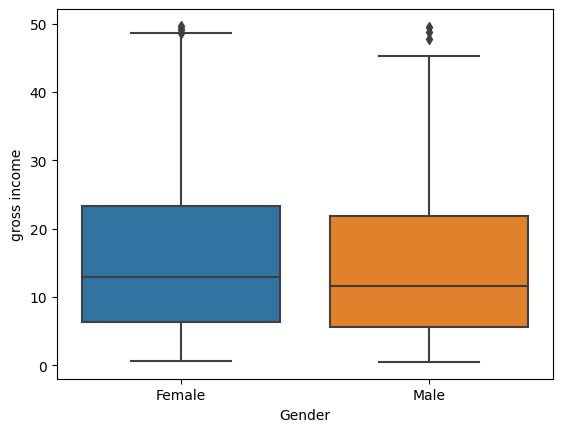

In [12]:
sns.boxplot(x=marketDF.Gender,y=marketDF['gross income'])

In [15]:
## noticeable time trend

marketDF.groupby(marketDF.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<AxesSubplot:xlabel='Date', ylabel='gross income'>

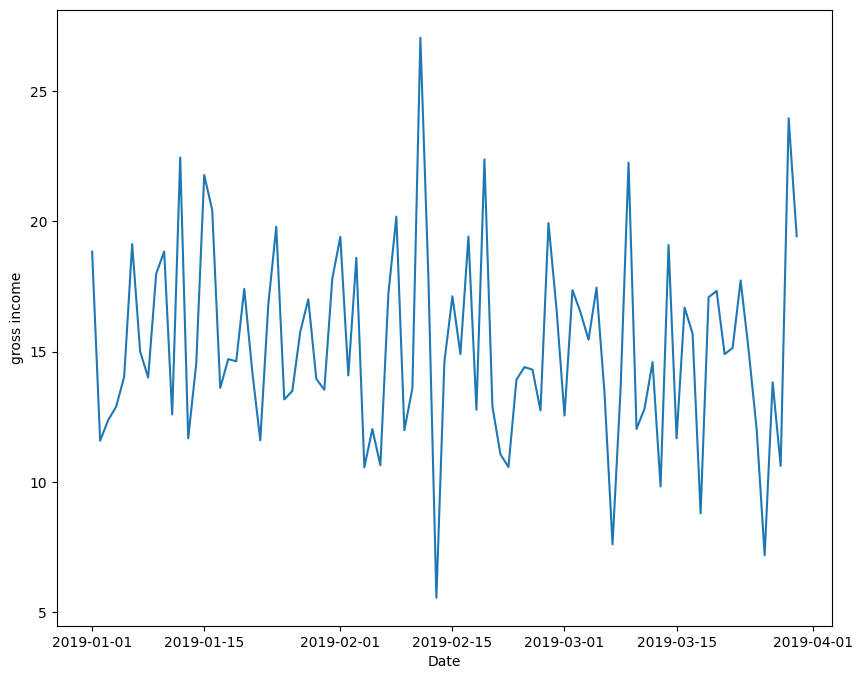

In [26]:
plt.figure(figsize = (10,8))
dff=marketDF.groupby(marketDF.index).mean()[['gross income']]
sns.lineplot(x=dff.index,y=dff['gross income'])

#### t4 duplicate values missing rows

In [7]:
marketDF.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [13]:
mask =marketDF.duplicated()
mask, mask.sum()

(Date
 2019-01-05    False
 2019-03-08    False
 2019-03-03    False
 2019-01-27    False
 2019-02-08    False
               ...  
 2019-02-22    False
 2019-02-18    False
 2019-02-18     True
 2019-03-10     True
 2019-01-26     True
 Length: 1003, dtype: bool,
 3)

In [14]:
marketDF[mask]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [15]:
marketDF[~mask].head(2)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-01-05  13:08  Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29     Cash   76.40                 4.761905        3.8200   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6

In [66]:
marketDF.drop_duplicates(inplace=True)
marketDF.duplicated().sum()

0

In [67]:
marketDF.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:ylabel='Date'>

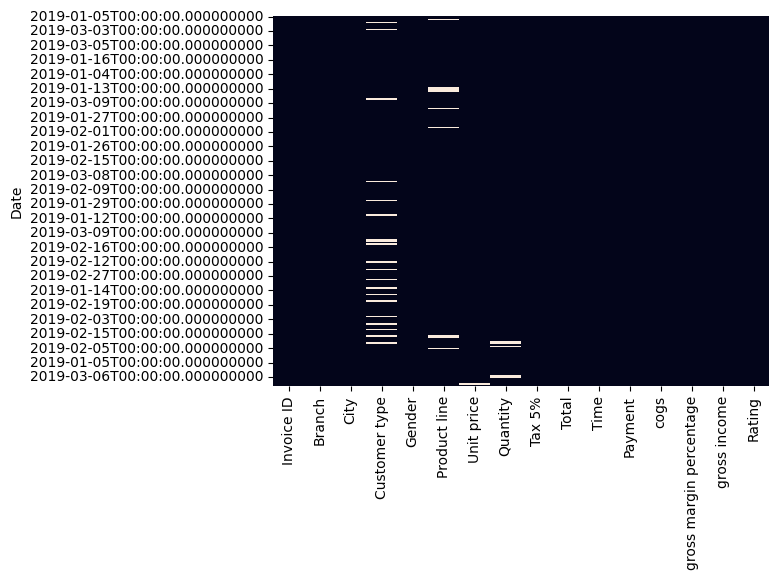

In [21]:
sns.heatmap(marketDF.isna(), cbar=False)

In [76]:
#### mean values filling numerical NaNs

marketDF.fillna(marketDF.mean(),inplace=True)

/tmp/ipykernel_25158/3766606296.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  marketDF.fillna(marketDF.mean(),inplace=True)


In [77]:
marketDF.Quantity.fillna(marketDF.mean(),inplace=True)

/tmp/ipykernel_25158/2019977681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  marketDF.Quantity.fillna(marketDF.mean(),inplace=True)


In [78]:
marketDF.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [29]:
### filling characters into NaN
marketDF.mode().head(1)

Invoice ID Branch    City Customer type  Gender         Product line  \
0  101-17-6199      A  Yangon        Normal  Female  Fashion accessories   

   Unit price  Quantity  Tax 5%   Total   Time  Payment   cogs  \
0   55.700292      10.0   4.154  87.234  14:42  Ewallet  83.08   

   gross margin percentage  gross income  Rating  
0                 4.761905         4.154     6.0

In [70]:
ct=marketDF[['Customer type','Product line']].mode().head(1)
ct

Customer type         Product line
0        Normal  Fashion accessories

In [71]:
ct.iloc[0,0], ct.iloc[0,1]

('Normal', 'Fashion accessories')

In [72]:
##### df.fillna(df.mode().iloc[0],inplace=True)

marketDF['Customer type'].fillna(ct.iloc[0,0], inplace=True)
marketDF['Product line'].fillna(ct.iloc[0,1], inplace=True)


marketDF.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [44]:
dataset = pd.read_csv('project/supermarket_sales.csv')
prof = ProfileReport(dataset)

prof

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


### correlation analysis

In [46]:
marketDF.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [56]:
np.corrcoef(marketDF['gross income'], marketDF['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [52]:
round(np.corrcoef(marketDF['gross income'], marketDF['Rating'])[1][0],2)

-0.04

In [73]:
round(marketDF.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

In [74]:
np.round(marketDF.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

In [62]:
gmp = marketDF[['gross margin percentage']]
gmp.to_csv('xx.csv', index=False)

<AxesSubplot:>

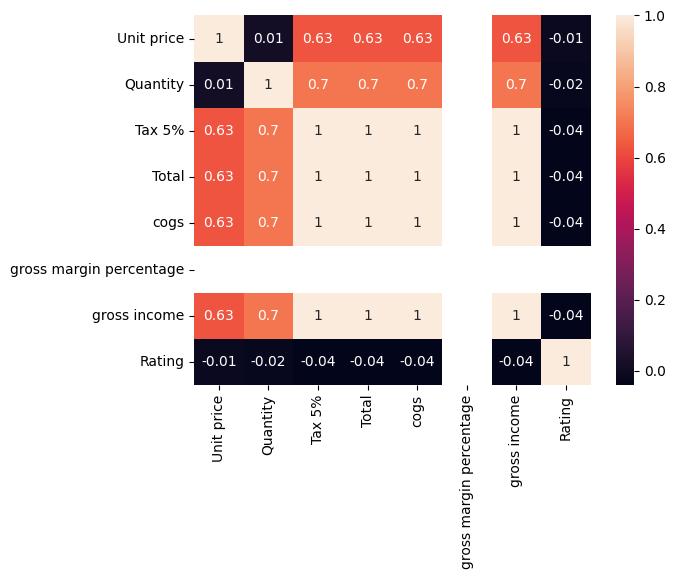

In [75]:
sns.heatmap(np.round(marketDF.corr(),2),annot=True)